In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import Binarizer

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score,roc_auc_score
from sklearn.metrics import precision_recall_curve,roc_curve,confusion_matrix , auc

import FinanceDataReader as fdr

import warnings
warnings.filterwarnings("ignore")

In [2]:
## 불균형 처리 안한 데이터 
train = pd.read_csv("./data/전처리완료/코스닥_train원본.csv", index_col=0)
test =  pd.read_csv("./data/전처리완료/코스닥_test원본.csv",index_col=0)

train = train.sort_values(by=['회계년도'],ascending=True)
test = test.sort_values(by=['회계년도'],ascending=True)

train.rename(columns={'abs(영업현금흐름-당기순이익)/매출액': 'CND'},inplace=True)
test.rename(columns={'abs(영업현금흐름-당기순이익)/매출액': 'CND'},inplace=True)

id_col = ['회사명', '거래소코드', '회계년도', '산업군','target_3']
최종_col_3 = ['CND', '누적수익성비율', 'WW지수','금융비용부담률', 'TMD', '순운전자본비율']


train_x = train[최종_col_3]
train_y = train["target_3"]

test_x = test[최종_col_3]
test_y = test["target_3"]

---
lr

Text(50.722222222222214, 0.5, 'Actual')

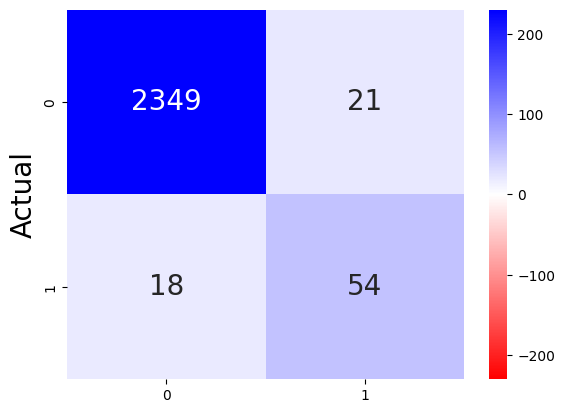

In [45]:
lr=LogisticRegression(C=0.005, max_iter=100, penalty='l2', solver='liblinear',random_state=1)
lr.fit(train_x,train_y)

pred_lr = lr.predict(test_x)
pred_prob_lr = lr.predict_proba(test_x)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.36).fit(pred_prob_lr) 
custom_rf = binarizer.transform(pred_prob_lr)
cm = confusion_matrix(test_y, custom_rf)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap=cmap, fmt='g', vmin=-230, vmax=230)
plt.ylabel('Actual', fontsize=20)

---
lda

Text(50.722222222222214, 0.5, 'Actual')

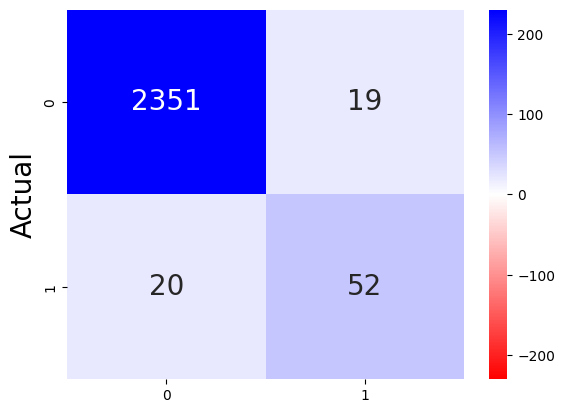

In [39]:
lda=LinearDiscriminantAnalysis(priors=[0.9619025629184945, 0.038097437081505425], shrinkage = "auto" , solver = 'lsqr' )
lda.fit(train_x,train_y)

pred_lda = lda.predict(test_x)
pred_prob_lda = lda.predict_proba(test_x)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.44).fit(pred_prob_lda) 
custom_rf = binarizer.transform(pred_prob_lda)
cm = confusion_matrix(test_y, custom_rf)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap=cmap, fmt='g', vmin=-230, vmax=230)
plt.ylabel('Actual', fontsize=20)

---
nb

Text(50.722222222222214, 0.5, 'Actual')

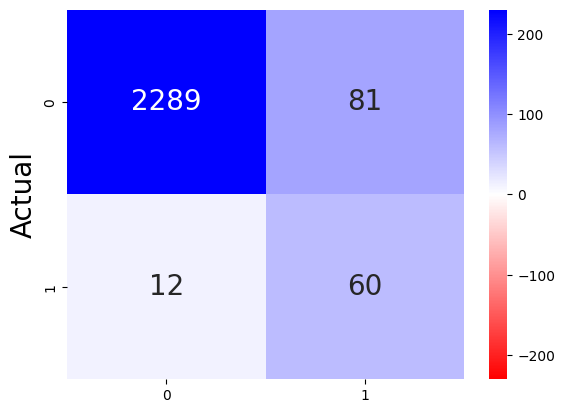

In [40]:
a = train_y.value_counts(property)
nb=GaussianNB(priors=[a[0],a[1]])

nb.fit(train_x,train_y)

pred_nb = nb.predict(test_x)
pred_prob_nb = nb.predict_proba(test_x)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.7).fit(pred_prob_nb) 
custom_rf = binarizer.transform(pred_prob_nb)
cm = confusion_matrix(test_y, custom_rf)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap=cmap, fmt='g', vmin=-230, vmax=230)
plt.ylabel('Actual', fontsize=20)

---
rf

Text(50.722222222222214, 0.5, 'Actual')

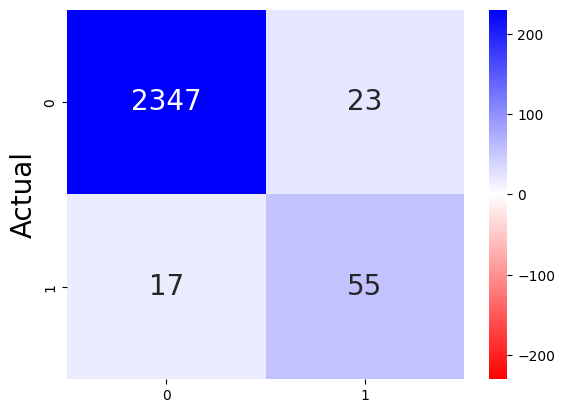

In [38]:
rf=RandomForestClassifier(random_state=1,n_jobs=-1,max_depth = 10, max_features = "sqrt",min_samples_leaf = 1,min_samples_split = 5,  n_estimators = 50 )


rf.fit(train_x,train_y)

pred_rf = rf.predict(test_x)
pred_prob_rf = rf.predict_proba(test_x)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.3).fit(pred_prob_rf) 
custom_rf = binarizer.transform(pred_prob_rf)
cm = confusion_matrix(test_y, custom_rf)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap=cmap, fmt='g', vmin=-230, vmax=230)
plt.ylabel('Actual', fontsize=20)

---
XGB

[20:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.



Text(50.722222222222214, 0.5, 'Actual')

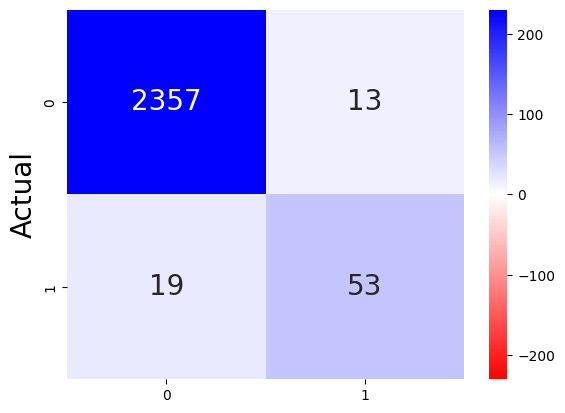

In [43]:
xgb = XGBClassifier(random_state=1, n_jobs=-1,class_weight = 'balanced_subsample', colsample_bytree = 0.9, gamma = 0, learning_rate = 0.01, max_depth = 15, min_child_weight = 1, n_estimators = 100, subsample= 0.9)
xgb.fit(train_x,train_y)

pred_xgb = xgb.predict(test_x)
pred_prob_xgb = xgb.predict_proba(test_x)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.44).fit(pred_prob_xgb) 
custom_xgb = binarizer.transform(pred_prob_xgb)
cm = confusion_matrix(test_y, custom_xgb)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap=cmap, fmt='g', vmin=-230, vmax=230)
plt.ylabel('Actual', fontsize=20)